### Introduction
Our goal is to find key insights regarding video content consumption in order to determine which type of content our new movie studio should produce. By analyzing production budgets, box office returns, ratings, and genre breakdowns, we aim to identify which types of content are most likely to succeed. This analysis leverages Python libraries such as pandas, seaborn, and matplotlib, and integrates data from CSVs, TSVs, and a SQLite database.

### Key Questions
* How do different genres perform according to ratings?

* How do different genres perform according to profitability?

* How do production budgets relate to box office revenues?

### Objectives

- Clean and merge relevant movie datasets for unified analysis.

- Add new features such as profit and rating categories.

- Visualize relationships between budget, gross, ratings, and genres.

- Identify top-performing genres in terms of finance metrics.

- Provide recommendations for content production.


In [52]:
#import the libraries necessary for our EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline

### Data Inspection And Cleaning

In [53]:
#loading the files into python environment
movie_budgets = pd.read_csv('../data/tn.movie_budgets.csv')
movies = pd.read_csv('../data/tmdb.movies.csv')
movie_gross = pd.read_csv('../data/bom.movie_gross.csv')
movie_info = pd.read_csv('../data/rt.movie_info.tsv', delimiter='\t')
review = pd.read_csv('../data/rt.reviews.tsv', delimiter='\t',encoding='latin-1')
conn = sqlite3.connect('../data/im.db')

In [54]:
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [55]:
movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [56]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [57]:
review.head()


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [58]:
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [59]:
#checking the columns of movie_budgets dataframe
movie_budgets.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [60]:
#renaming the column 'movie' to 'title' in movie_budgets dataframe
movie_budgets.rename(columns={'movie':'title'}, inplace = True)

In [61]:
#converting the 'release_date' column to datetime format
movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])

In [62]:
#removing the '$' and ',' then converting the columns to float type
for col in ['production_budget','domestic_gross','worldwide_gross']:
    movie_budgets[col] = movie_budgets[col].str.replace('$','').str.replace(',','').astype(float)

In [63]:
#creating a new column 'profit' by subtracting 'production_budget' from 'worldwide_gross'
movie_budgets['profit']= movie_budgets['worldwide_gross'] - movie_budgets['production_budget']

In [64]:
movie_budgets.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,profit
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08


In [65]:
#checking the info of movie_budgets dataframe
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   title              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   profit             5782 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 316.3+ KB


In [66]:
#checking for duplicate values in movie_budgets dataframe
movie_budgets.duplicated().sum()

np.int64(0)

In [67]:
#checking the columns of movies dataframe
movies.columns

Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [68]:
#dropping the 'Unnamed: 0' column from movies dataframe
movies.drop('Unnamed: 0', axis=1, inplace=True)

In [69]:
#converting the 'release_date' column to datetime format
movies['release_date'] = pd.to_datetime(movies['release_date'])

In [70]:
#checking for duplicate values in movies dataframe
movies.duplicated().sum()
movies.drop_duplicates(inplace=True)

In [71]:
#standardizing the column names to lowercase and removing any leading/trailing spaces
for df in [movie_budgets,movies]:
    df.columns = df.columns.str.lower().str.strip('')

In [72]:
#standardizing the 'title' column to lowercase and removing any leading/trailing spaces
for df in [movie_budgets,movies]:
    df['title'] = df['title'].str.lower().str.strip('')

In [73]:
#merging the two dataframes on 'title' and 'release_date' columns
movies_budget_merged = pd.merge(movies, movie_budgets, on=['title','release_date'], how='inner')


In [74]:
#checking for duplicate values in the merged dataframe
movies_budget_merged.duplicated().sum()

np.int64(0)

In [75]:
#checking the columns and info of movie_gross dataframe
movie_gross.columns
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [76]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [77]:
#checking the columns and info of review dataframe
review.columns
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [78]:
info_review = movie_info.merge(review, on='id', how='inner')

In [79]:
#checking the tables in the database
db_tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
db_tables

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [80]:
#loading the tables into pandas dataframes
db_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
db_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)

In [81]:
#checking the info of db_basics dataframe and renaming columns
db_basics.info()
db_basics.rename(columns={'start_year':'year'}, inplace=True)
db_basics.rename(columns={'primary_title':'title'}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [82]:
#checking the info of db_ratings dataframe
db_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


### Data Merging

In [83]:
#merging the two dataframes on 'movie_id' column
db_basics_ratings = db_basics.merge(db_ratings, on='movie_id', how='inner')
db_basics_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   title            73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   year             73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [84]:
#checking the info of db_basics_ratings dataframe and renaming columns
#removing '$' and ',' from 'foreign_gross' column and converting it to float type
db_basics_ratings.info()
db_basics_ratings.rename(columns={'start_year':'year'}, inplace=True)
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].str.replace('$','').str.replace(',','').astype(float)
movie_gross['year'] = movie_gross['year'].astype(int)#converting 'year' column to int type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   title            73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   year             73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [85]:
#checking the columns and info of movie_gross dataframe
movie_gross.columns
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [86]:
#merging db_basics_ratings and movie_gross dataframes on 'title' and 'year' columns
db_basics_ratings_gross = pd.merge(db_basics_ratings,movie_gross,on=['title', 'year'],how='left')

In [87]:
#checking the info of db_basics_ratings_gross dataframe
db_basics_ratings_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   title            73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   year             73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
 8   studio           1845 non-null   object 
 9   domestic_gross   1837 non-null   float64
 10  foreign_gross    1269 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 6.2+ MB


In [88]:
#creating a new column 'rating' based on the 'averagerating' column
db_basics_ratings_gross['ratingcategory'] = db_basics_ratings_gross['averagerating'].apply(lambda x: 'Good' if x >=7 else ('Average' if x >=4 else 'Poor'))


In [89]:
#handling missing values in db_basics_ratings_gross dataframe
db_basics_ratings_gross['genres'] = db_basics_ratings_gross['genres'].fillna('Unknown')
db_basics_ratings_gross['runtime_minutes'] = db_basics_ratings_gross['runtime_minutes'].fillna(db_basics_ratings_gross['runtime_minutes'].median())
db_basics_ratings_gross['studio'] = db_basics_ratings_gross['studio'].fillna('Unknown')
db_basics_ratings_gross['domestic_gross'] = db_basics_ratings_gross['domestic_gross'].fillna(0)
db_basics_ratings_gross['foreign_gross'] = db_basics_ratings_gross['foreign_gross'].fillna(0) 
db_basics_ratings_gross['total_gross'] = db_basics_ratings_gross['domestic_gross'] + db_basics_ratings_gross['foreign_gross']

In [90]:
#splitting the 'genres' column into multiple rows
db_basics_ratings_gross['genres_split'] = db_basics_ratings_gross['genres'].str.split(',')
genreexploded = db_basics_ratings_gross.explode('genres_split')
db_basics_ratings_gross = genreexploded.rename(columns={'genres_split':'genre'})
db_basics_ratings_gross['genre'] = db_basics_ratings_gross['genre'].astype('category')

In [91]:
db_basics_ratings_gross['genre'].value_counts()

genre
Drama          30788
Documentary    17753
Comedy         17290
Thriller        8217
Horror          7674
Action          6988
Romance         6589
Crime           4611
Adventure       3817
Biography       3809
Family          3412
Mystery         3039
History         2825
Sci-Fi          2206
Fantasy         2126
Music           1968
Animation       1743
Sport           1179
War              853
Unknown          804
Musical          721
News             579
Western          280
Reality-TV        17
Adult              3
Game-Show          2
Short              1
Name: count, dtype: int64

In [92]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   title              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   profit             5782 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 316.3+ KB


In [93]:
#checking for any remaining missing values in db_basics_ratings_gross dataframe
db_basics_ratings_gross.isna().sum()
db_basics_ratings_gross.info()    


<class 'pandas.core.frame.DataFrame'>
Index: 129294 entries, 0 to 73855
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   movie_id         129294 non-null  object  
 1   title            129294 non-null  object  
 2   original_title   129294 non-null  object  
 3   year             129294 non-null  int64   
 4   runtime_minutes  129294 non-null  float64 
 5   genres           129294 non-null  object  
 6   averagerating    129294 non-null  float64 
 7   numvotes         129294 non-null  int64   
 8   studio           129294 non-null  object  
 9   domestic_gross   129294 non-null  float64 
 10  foreign_gross    129294 non-null  float64 
 11  ratingcategory   129294 non-null  object  
 12  total_gross      129294 non-null  float64 
 13  genre            129294 non-null  category
dtypes: category(1), float64(5), int64(2), object(6)
memory usage: 13.9+ MB


### Data Visualization

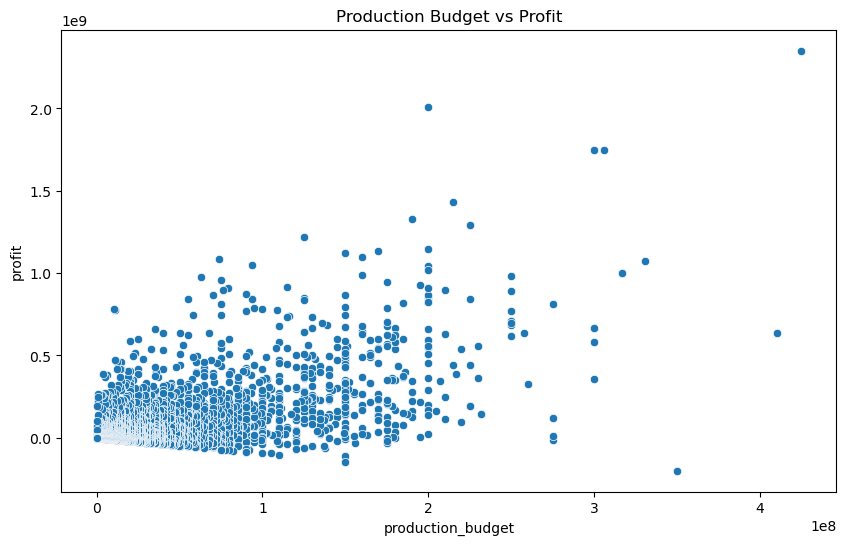

In [94]:
#visualizing the relationship between production budget and profit
fig, ax = plt.subplots(figsize=(10,6))
sns.scatterplot(data=movie_budgets, x='production_budget', y='profit', ax=ax)
prod_profit_corr = movie_budgets['profit'].corr(movie_budgets['production_budget'])
plt.title('Production Budget vs Profit')
plt.show()  

Higher budgets tend to yield higher profits up to a point.

In [95]:

#calculating the average total gross by movie rating
rating_gross = db_basics_ratings_gross.groupby('ratingcategory')['total_gross'].mean().sort_values(ascending=False)

C:\Users\user\AppData\Local\Temp\ipykernel_2740\2630747240.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_genre = db_basics_ratings_gross.groupby('genre')['averagerating'].mean().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,6), title='Top 10 Genres by Average Rating')


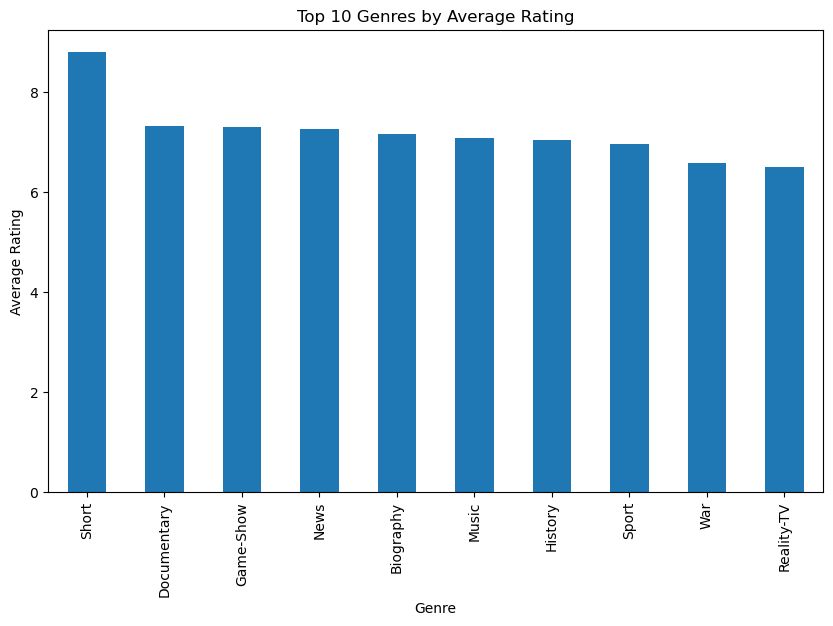

In [96]:
#analyzing the relationship between average rating and genre
db_basics_ratings_gross['genre'].value_counts()
rating_genre = db_basics_ratings_gross.groupby('genre')['averagerating'].mean().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,6), title='Top 10 Genres by Average Rating')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()

Genres like Documentaries are generally more highly rated on average.

C:\Users\user\AppData\Local\Temp\ipykernel_2740\3456219304.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  db_basics_ratings_gross.groupby('genre')['total_gross'].mean().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,6), title='Top 10 Genres by Average Total Gross')


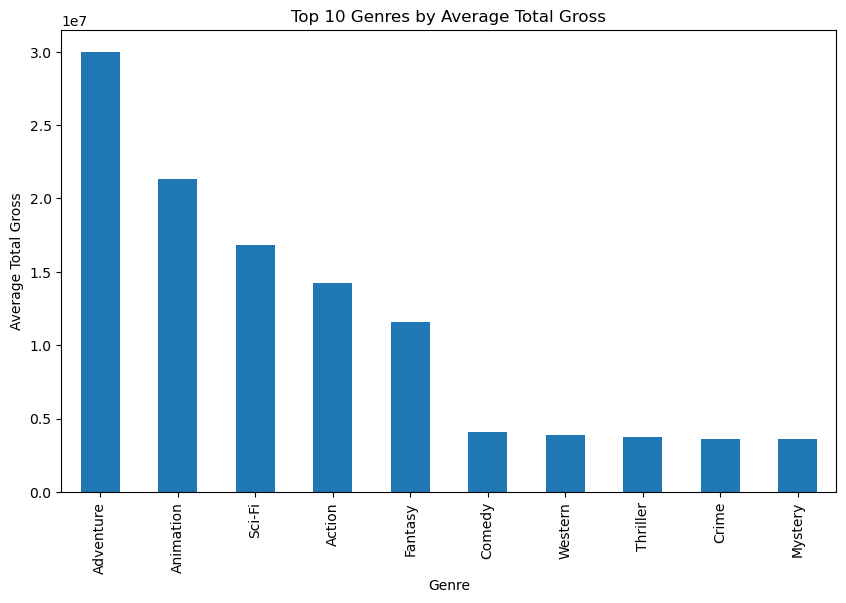

In [97]:
#analyzing the top 10 genres by average total gross
db_basics_ratings_gross['genre'].value_counts()
db_basics_ratings_gross.groupby('genre')['total_gross'].mean().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,6), title='Top 10 Genres by Average Total Gross')
plt.xlabel('Genre')
plt.ylabel('Average Total Gross')
plt.show()

Genres like Sci-Fi, Animation and Adventure perform strongly in terms of Average Revenue.

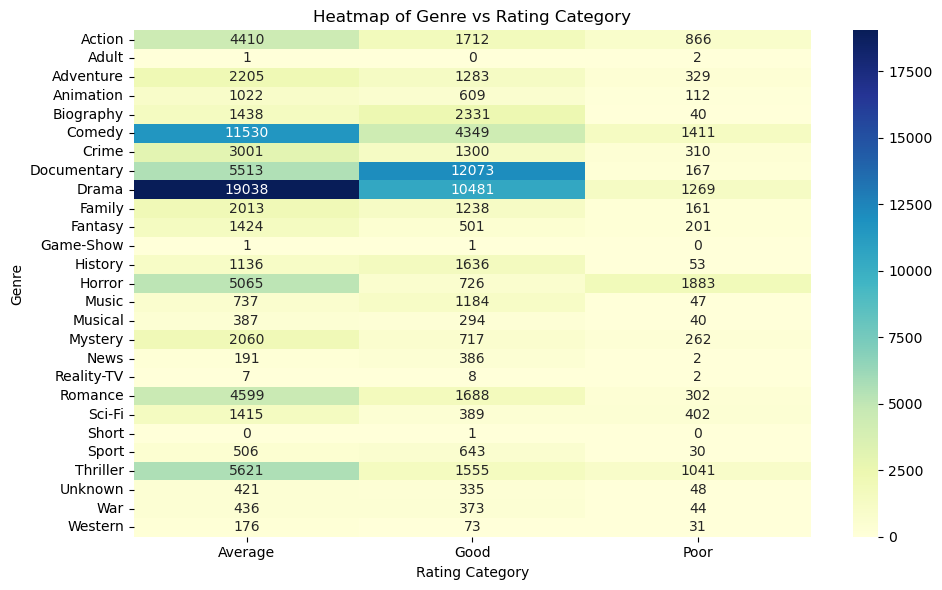

In [98]:
#visualizing the relationship between genre and rating category
table = pd.crosstab(db_basics_ratings_gross['genre'], db_basics_ratings_gross['ratingcategory'])
plt.figure(figsize=(10, 6))
sns.heatmap(table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Genre vs Rating Category')
plt.ylabel('Genre')
plt.xlabel('Rating Category')
plt.tight_layout()
plt.show()



### Conclusion
Through comprehensive data cleaning and exploratory data analysis, we uncovered some insights in terms of movie performance across genres, budgets, and ratings. Our findings reveal that while high production budgets often correlate with higher profits, genre and average ratings also play a crucial role in determining a film’s success. Genres like Action, Adventure, and Animation have higher returns, while Drama and Documentary perform better in ratings. We also observed that runtime and rating categories have an influence in film success.

### Recommendations
* Documentaries receive higher average ratings indicating strong audience appreciation. Invest in this genres when aiming to build a brand. It is important to consider the genre and number of votes because a genre like short had only one voter.

* Adventure, and Animation genres dominate in average total gross and profitability. We should therefore prioritize these genres for commercial releases, especially when targeting global audiences and maximizing returns.


* There’s a positive correlation between production budget and profit up to a point. We recommend focusing on mid budget films in proven genres to avoid overspending unless backed by strong market signals.